In [336]:
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, roc_curve,plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.linear_model import LogisticRegression


In [337]:
data_df = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data_df = data_df.drop(columns=['reservation_status_date'])


In [338]:
nan_replacements = {"children": 0.0, "agent": 0, "company": 0}
data_df = data_df.fillna(nan_replacements)

In [339]:
my_label_encoder = LabelEncoder()

for el in data_df:
    if data_df[el].dtype == object:
        my_label_encoder.fit(data_df[el]) 
        tmp = my_label_encoder.transform(data_df[el]).reshape((-1,1))
        data_df[el] = pd.DataFrame(tmp)

data_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,0.00000,0.00000,0,2,0.00000,0,0,1
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,0.00000,0.00000,0,2,0.00000,0,0,1
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0.00000,0.00000,0,2,75.00000,0,0,1
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.00000,0.00000,0,2,75.00000,0,0,1
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.00000,0.00000,0,2,98.00000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,394.00000,0.00000,0,2,96.14000,0,0,1
119386,0,0,102,2017,1,35,31,2,5,3,...,0,0,9.00000,0.00000,0,2,225.43000,0,2,1
119387,0,0,34,2017,1,35,31,2,5,2,...,0,0,9.00000,0.00000,0,2,157.71000,0,4,1
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,89.00000,0.00000,0,2,104.40000,0,0,1


In [340]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [341]:
data_df.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,...,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000,119390.00000
mean,0.33554,0.37042,104.01142,2016.15655,5.49054,27.16517,15.79824,0.92760,2.50030,1.85640,...,0.22112,0.12489,74.82832,10.77516,2.32115,2.13732,101.83112,0.06252,0.57136,0.64980
std,0.47218,0.48292,106.86310,0.70748,3.53507,13.60514,8.78083,0.99861,1.90829,0.57926,...,0.65231,0.33468,107.14195,53.94388,17.59472,0.57704,50.53579,0.24529,0.79280,0.49778
min,0.00000,0.00000,0.00000,2015.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-6.38000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,18.00000,2016.00000,2.00000,16.00000,8.00000,0.00000,1.00000,2.00000,...,0.00000,0.00000,7.00000,0.00000,0.00000,2.00000,69.29000,0.00000,0.00000,0.00000
50%,0.00000,0.00000,69.00000,2016.00000,6.00000,28.00000,16.00000,1.00000,2.00000,2.00000,...,0.00000,0.00000,9.00000,0.00000,0.00000,2.00000,94.57500,0.00000,0.00000,1.00000
75%,1.00000,1.00000,160.00000,2017.00000,8.00000,38.00000,23.00000,2.00000,3.00000,2.00000,...,0.00000,0.00000,152.00000,0.00000,0.00000,2.00000,126.00000,0.00000,1.00000,1.00000
max,1.00000,1.00000,737.00000,2017.00000,11.00000,53.00000,31.00000,19.00000,50.00000,55.00000,...,21.00000,2.00000,535.00000,543.00000,391.00000,3.00000,5400.00000,8.00000,5.00000,2.00000


In [342]:
data_df.shape

(119390, 31)

In [343]:
data_df_corr = data_df.corr()
data_df_corr

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.00000,-0.13653,-0.07538,-0.03527,-0.03538,-0.00127,0.00186,0.18660,0.23402,0.01318,...,0.07282,-0.15902,0.65104,0.10486,-0.07243,-0.04753,-0.09672,0.21887,0.04339,0.12433
is_canceled,-0.13653,1.00000,0.29312,0.01666,-0.00149,0.00815,-0.00613,-0.00179,0.02476,0.06002,...,-0.14438,0.46863,-0.04653,-0.08299,0.05419,-0.06814,0.04756,-0.19550,-0.23466,-0.91720
lead_time,-0.07538,0.29312,1.00000,0.04014,0.08623,0.12687,0.00227,0.08567,0.16580,0.11952,...,0.00015,0.37567,-0.01264,-0.08625,0.17008,0.07340,-0.06308,-0.11645,-0.09571,-0.30217
arrival_date_year,-0.03527,0.01666,0.04014,1.00000,-0.25184,-0.54056,-0.00022,0.02150,0.03088,0.02964,...,0.03087,-0.06471,0.05646,0.03388,-0.05650,-0.00615,0.19758,-0.01368,0.10853,-0.01768
arrival_date_month,-0.03538,-0.00149,0.08623,-0.25184,1.00000,0.30223,-0.01794,-0.03187,-0.02575,-0.05828,...,-0.01785,0.06817,-0.04099,0.02889,0.04836,0.01203,-0.10900,-0.01859,-0.05305,-0.00161
arrival_date_week_number,-0.00127,0.00815,0.12687,-0.54056,0.30223,1.00000,0.06681,0.01821,0.01556,0.02591,...,0.00551,0.00389,-0.01824,-0.03275,0.02293,-0.02843,0.07579,0.00192,0.02615,-0.01739
arrival_date_day_of_month,0.00186,-0.00613,0.00227,-0.00022,-0.01794,0.06681,1.00000,-0.01635,-0.02817,-0.00157,...,0.01061,-0.00136,0.00020,0.00372,0.02273,0.01219,0.03025,0.00868,0.00306,0.01146
stays_in_weekend_nights,0.18660,-0.00179,0.08567,0.02150,-0.03187,0.01821,-0.01635,1.00000,0.49897,0.09187,...,0.06328,-0.11143,0.16143,-0.07998,-0.05415,-0.10922,0.04934,-0.01855,0.07267,0.00856
stays_in_week_nights,0.23402,0.02476,0.16580,0.03088,-0.02575,0.01556,-0.02817,0.49897,1.00000,0.09298,...,0.09621,-0.07679,0.19514,-0.04364,-0.00202,-0.12722,0.06524,-0.02486,0.06819,-0.02161
adults,0.01318,0.06002,0.11952,0.02964,-0.05828,0.02591,-0.00157,0.09187,0.09298,1.00000,...,-0.05167,-0.02764,0.02499,-0.16678,-0.00828,-0.10176,0.23064,0.01478,0.12288,-0.07180


In [344]:
corr_matrix = data_df_corr['is_canceled'].abs().sort_values(ascending=False)
corr_matrix

is_canceled                      1.00000
reservation_status               0.91720
deposit_type                     0.46863
lead_time                        0.29312
country                          0.26422
total_of_special_requests        0.23466
required_car_parking_spaces      0.19550
assigned_room_type               0.17603
distribution_channel             0.16760
booking_changes                  0.14438
hotel                            0.13653
previous_cancellations           0.11013
is_repeated_guest                0.08479
company                          0.08299
customer_type                    0.06814
reserved_room_type               0.06128
adults                           0.06002
market_segment                   0.05934
previous_bookings_not_canceled   0.05736
days_in_waiting_list             0.05419
adr                              0.04756
agent                            0.04653
babies                           0.03249
stays_in_week_nights             0.02476
meal            

In [345]:
# ax = plt.subplots(figsize= (15, 5))
# sns.heatmap(data_df, annot=True)


# data_df['customer_type'].unique()
# data_df['market_segment'].replace(' ', '_', regex=True, inplace=True)


In [380]:
max_depth = 7   
min_samples_leaf = 7
random_state = 42
n_estimators = 5

In [381]:
X = data_df[['deposit_type','lead_time','country','total_of_special_requests','required_car_parking_spaces','assigned_room_type','distribution_channel','booking_changes','hotel','previous_cancellations']]

In [382]:
y = data_df['is_canceled']

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2)

In [396]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95512, 10), (23878, 10), (95512,), (23878,))

In [397]:
clf_tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

In [398]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=7)

[Text(204.3675, 203.85, 'X[0] <= 0.5\ngini = 0.466\nsamples = 95512\nvalue = [60259, 35253]'),
 Text(115.98428571428572, 176.67000000000002, 'X[1] <= 11.5\ngini = 0.406\nsamples = 83802\nvalue = [60078, 23724]'),
 Text(54.205714285714286, 149.49, 'X[4] <= 0.5\ngini = 0.198\nsamples = 18958\nvalue = [16847, 2111]'),
 Text(51.01714285714286, 122.31, 'X[1] <= 7.5\ngini = 0.223\nsamples = 16509\nvalue = [14398, 2111]'),
 Text(25.50857142857143, 95.13, 'X[2] <= 134.5\ngini = 0.19\nsamples = 13573\nvalue = [12131, 1442]'),
 Text(12.754285714285714, 67.94999999999999, 'X[2] <= 5.5\ngini = 0.117\nsamples = 5770\nvalue = [5411, 359]'),
 Text(6.377142857142857, 40.77000000000001, 'X[1] <= 1.5\ngini = 0.375\nsamples = 124\nvalue = [93, 31]'),
 Text(3.1885714285714286, 13.590000000000003, 'gini = 0.155\nsamples = 71\nvalue = [65, 6]'),
 Text(9.565714285714286, 13.590000000000003, 'gini = 0.498\nsamples = 53\nvalue = [28, 25]'),
 Text(19.13142857142857, 40.77000000000001, 'X[1] <= 5.5\ngini = 0.109

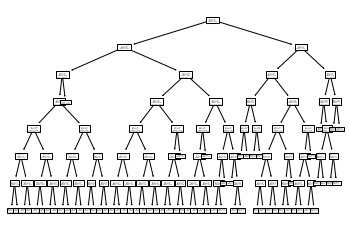

In [399]:
plot_tree(clf_tree)

In [400]:
y_pred = clf_tree.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print('DecisionTreeClasifier - Confusion matrix: \n',confusion_matrix(y_test, y_pred),'\n')
print('DecisionTreeClasifier - Classification_report: \n',classification_report(y_test, y_pred),'\n')
print(f'DecisionTreeClasifier - Accuracy score:\n{acc_score}')
print('DecisionTreeClasifier -Roc Auc Score \n', roc_auc_score(y_test, y_pred))

DecisionTreeClasifier - Confusion matrix: 
 [[13936   971]
 [ 4095  4876]] 

DecisionTreeClasifier - Classification_report: 
               precision    recall  f1-score   support

           0       0.77      0.93      0.85     14907
           1       0.83      0.54      0.66      8971

    accuracy                           0.79     23878
   macro avg       0.80      0.74      0.75     23878
weighted avg       0.80      0.79      0.78     23878
 

DecisionTreeClasifier - Accuracy score:
0.7878381774017924


TypeError: 'numpy.float64' object is not callable

In [ ]:
roc_auc_score=roc_auc_score(y_test, y_pred)


In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [ ]:
y_pred_sc = clf_tree.predict(X_test_sc)
acc_score = accuracy_score(y_test, y_pred_sc)
print('Zmienne wystandar. - Confusion matrix: \n',confusion_matrix(y_test, y_pred_sc),'\n')
print('Zmienne wystandar. - Classification_report: \n',classification_report(y_test, y_pred_sc),'\n')
print(f'Zmienne wystandar. - Accuracy score:\n{acc_score}')
print('Zmienne wystandar. - Roc Auc Score: \n', roc_auc_score(y_test, y_pred_sc))

Zmienne wystandar. - Confusion matrix: 
 [[45059     4]
 [26554    17]] 

Zmienne wystandar. - Classification_report: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77     45063
           1       0.81      0.00      0.00     26571

    accuracy                           0.63     71634
   macro avg       0.72      0.50      0.39     71634
weighted avg       0.70      0.63      0.49     71634
 

Zmienne wystandar. - Accuracy score:
0.6292542647346232


TypeError: 'numpy.float64' object is not callable

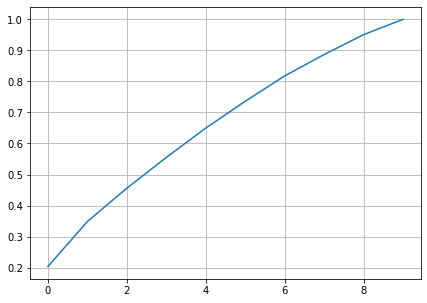

In [ ]:
# PCA

pca = PCA()

pca = PCA().fit(X_train_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.gcf().set_size_inches(7, 5)

In [ ]:
print(pca.explained_variance_ratio_)
print("\nWyniki po zaokragleniu do trzech miejsc po przecinku:\n")
print(np.round(pca.explained_variance_ratio_, 3))

[0.20376222 0.14483035 0.10740479 0.09904724 0.09460832 0.08642302
 0.0816536  0.06890023 0.06414017 0.04923006]

Wyniki po zaokragleniu do trzech miejsc po przecinku:

[0.204 0.145 0.107 0.099 0.095 0.086 0.082 0.069 0.064 0.049]


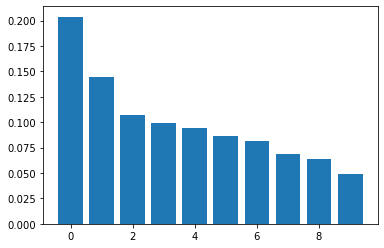

In [ ]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
pass

In [ ]:

n_pca_comp = 6
X_pca_train = pca.transform(X_train_sc)[:, :n_pca_comp]
X_pca_train

array([[-8.50824392e-01, -3.42692725e-02, -9.54491536e-01,
        -8.60462354e-02, -1.02931019e-01,  1.43837634e-01],
       [-1.69003253e-01, -1.27194553e+00, -9.64748446e-01,
        -1.25908598e-02,  3.91354674e-01, -5.13659735e-04],
       [ 1.49734876e+00, -2.50610852e+00,  5.43960967e-01,
         7.15082641e-01,  9.80302047e-01,  1.10061135e+00],
       ...,
       [-5.85866210e-01, -6.69741732e-01, -8.41977106e-01,
        -1.88276821e-02,  1.09651706e-01,  5.18735993e-02],
       [ 3.43966687e-01, -1.83801649e-01,  8.28371086e-01,
        -7.84916238e-01, -2.23535217e-01,  2.95801211e-01],
       [ 9.09435802e-01,  1.37488795e+00, -9.79236358e-01,
        -3.03846847e-01,  2.96236256e-01,  9.31187329e-02]])

In [ ]:
X_pca_test = pca.transform(X_test_sc)[:, :n_pca_comp]
X_pca_test

array([[ 2.40599044,  1.69093554,  2.13826964,  5.29929512,  0.5671463 ,
        -1.59324819],
       [-0.87069283, -0.0409411 , -0.92896979, -0.08740426, -0.11680943,
         0.13966415],
       [ 2.74833943, -0.91272712,  1.41002351,  1.90790126,  0.27793119,
        -1.70661569],
       ...,
       [ 0.16711523,  1.59199752, -2.60710536,  0.49346457,  0.69952062,
         0.39252974],
       [ 0.14477304,  1.59065291, -2.57517512,  0.50154556,  0.68888354,
         0.38753257],
       [-3.85892194,  0.67716692,  1.67017151,  0.4159191 , -1.31316888,
         0.05409339]])

In [ ]:
tree_pca = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
tree_pca = tree_pca.fit(X_pca_train, y_train)

[Text(114.52787790697676, 205.35999999999999, 'X[0] <= -1.655\ngini = 0.466\nsamples = 47756\nvalue = [30103, 17653]'),
 Text(16.253372093023255, 181.2, 'X[1] <= -0.564\ngini = 0.045\nsamples = 5986\nvalue = [137, 5849]'),
 Text(6.228837209302326, 157.04, 'X[5] <= 0.242\ngini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(4.671627906976744, 132.88, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(7.786046511627908, 132.88, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(26.277906976744188, 157.04, 'X[1] <= 0.146\ngini = 0.035\nsamples = 5953\nvalue = [106, 5847]'),
 Text(10.90046511627907, 132.88, 'X[1] <= -0.093\ngini = 0.382\nsamples = 210\nvalue = [54, 156]'),
 Text(4.671627906976744, 108.72, 'X[2] <= 1.375\ngini = 0.16\nsamples = 114\nvalue = [10, 104]'),
 Text(3.114418604651163, 84.56, 'X[1] <= -0.112\ngini = 0.088\nsamples = 108\nvalue = [5, 103]'),
 Text(1.5572093023255815, 60.400000000000006, 'gini = 0.0\nsamples = 73\nvalue = [0, 73]'),
 Text(4.671627906976744, 60.4000

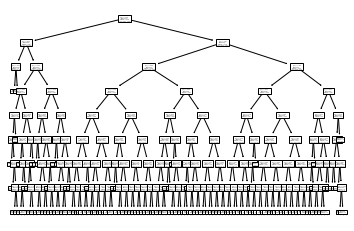

In [ ]:
plot_tree(tree_pca)

In [ ]:
y_pred_pca = tree_pca.predict(X_pca_test)
acc_score_pca = accuracy_score(y_test, y_pred_pca)
print('PCA - Confusion matrix: \n', confusion_matrix(y_test, y_pred_pca),'\n')
print('PCA - Classification_report: \n', classification_report(y_test, y_pred_pca),'\n')
print(f'PCA - Accuracy score: \n{acc_score_pca}\n')
print('PCA - Roc Auc Score: \n', roc_auc_score(y_test, y_pred_pca))

PCA - Confusion matrix: 
 [[41359  3704]
 [11615 14956]] 

PCA - Classification_report: 
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     45063
           1       0.80      0.56      0.66     26571

    accuracy                           0.79     71634
   macro avg       0.79      0.74      0.75     71634
weighted avg       0.79      0.79      0.78     71634
 

PCA - Accuracy score: 
0.7861490353742636



TypeError: 'numpy.float64' object is not callable

In [ ]:
# XGBoost
xgb_cl = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, use_label_encoder=False, eval_metric='error')


In [ ]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred_xgb = xgb_cl.predict(X_test)

In [ ]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost - Accuracy score: \n", acc_xgb)

XGBoost - Accuracy score: 
 0.8023424630761928


In [ ]:
# Regresja logistyczna

clf_lr = LogisticRegression(random_state=random_state)

In [ ]:
clf_lr.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_lr = clf_lr.predict(X_test_sc)
acc_lr = accuracy_score(y_test, y_pred_lr)
# roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print("Logistic Regression - Accuracy Score: \n", acc_lr, '\n')
# print("Linear Regression: \n", roc_auc_lr)

Logistic Regression - Accuracy Score: 
 0.7715051511851914 



In [ ]:
print('DecisionTreeClasifier - Confusion matrix: \n',confusion_matrix(y_test, y_pred),'\n')
print('DecisionTreeClasifier - Classification_report: \n',classification_report(y_test, y_pred),'\n')
print(f'DecisionTreeClasifier - Accuracy score:\n{acc_score}')
print('DecisionTreeClasifier -Roc Auc Score \n', roc_auc_score(y_test, y_pred))
print('\n')
print('Zmienne wystandar. - Confusion matrix: \n',confusion_matrix(y_test, y_pred_sc),'\n')
print('Zmienne wystandar. - Classification_report: \n',classification_report(y_test, y_pred_sc),'\n')
print(f'Zmienne wystandar. - Accuracy score:\n{acc_score}')
print('Zmienne wystandar. - Roc Auc Score: \n', roc_auc_score(y_test, y_pred_sc))
print('\n')
print("XGBoost - Accuracy score: \n", acc_xgb)
print('\n')
print("Logistic Regression - Accuracy Score: \n", acc_lr, '\n')
print("Linear Regression: \n", roc_auc_lr)

DecisionTreeClasifier - Confusion matrix: 
 [[40850  4213]
 [10867 15704]] 

DecisionTreeClasifier - Classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.84     45063
           1       0.79      0.59      0.68     26571

    accuracy                           0.79     71634
   macro avg       0.79      0.75      0.76     71634
weighted avg       0.79      0.79      0.78     71634
 

DecisionTreeClasifier - Accuracy score:
0.6292542647346232


TypeError: 'numpy.float64' object is not callable